# Autoregressive Moving Average (ARMA): Sunspots data

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [3]:
from statsmodels.graphics.api import qqplot

## Sunspots Data

In [4]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [5]:
dta = sm.datasets.sunspots.load_pandas().data

In [6]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

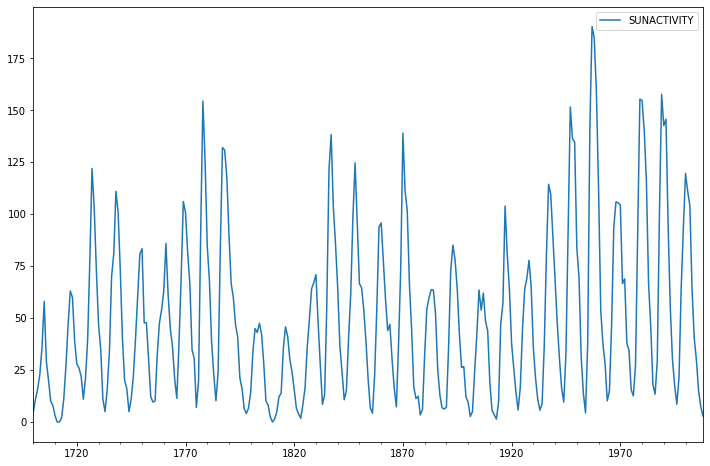

In [7]:
dta.plot(figsize=(12,8));

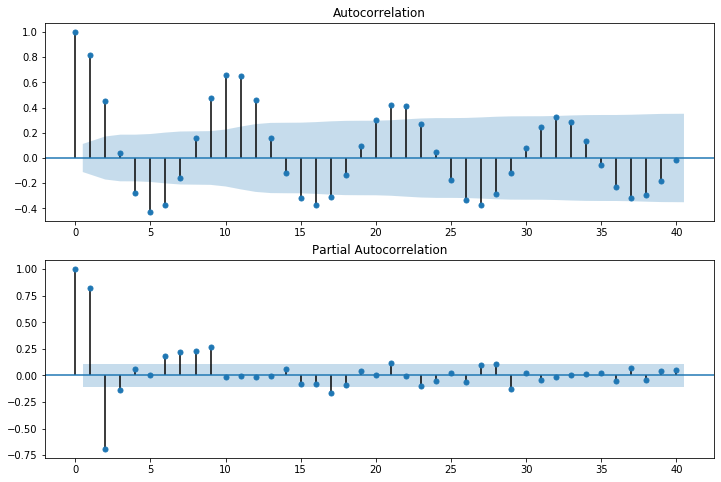

In [8]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [9]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)

const                49.659415
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


/home/travis/build/statsmodels/statsmodels/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [10]:
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=False)

/home/travis/build/statsmodels/statsmodels/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [11]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.636338063735 2637.5697031713257 2628.606725908981


In [12]:
print(arma_mod30.params)

const                49.749907
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129650
dtype: float64


In [13]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2619.403628696615 2638.070335081104 2626.8666135031726


* Does our model obey the theory?

In [14]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564809883560828

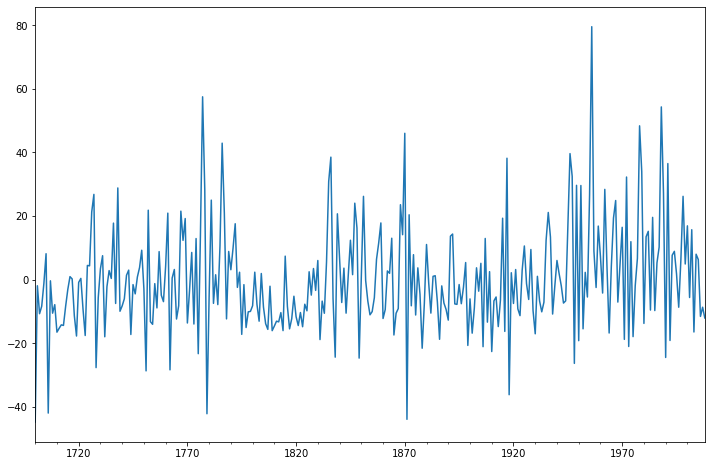

In [15]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [16]:
resid = arma_mod30.resid

In [17]:
stats.normaltest(resid)

NormaltestResult(statistic=49.84501653358502, pvalue=1.500694132607906e-11)

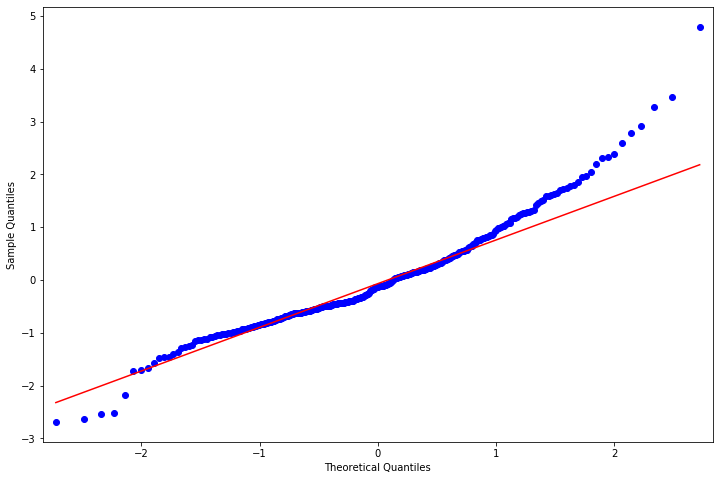

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

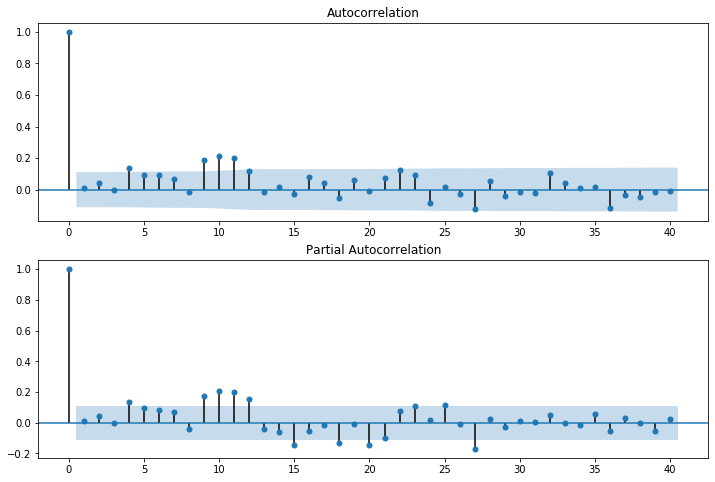

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [20]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.009179   0.026286  8.712037e-01
2.0   0.041793   0.573042  7.508715e-01
3.0  -0.001335   0.573601  9.024483e-01
4.0   0.136089   6.408924  1.706201e-01
5.0   0.092468   9.111835  1.046857e-01
6.0   0.091948  11.793251  6.674327e-02
7.0   0.068748  13.297210  6.518964e-02
8.0  -0.015020  13.369238  9.976106e-02
9.0   0.187592  24.641917  3.393901e-03
10.0  0.213718  39.321999  2.229470e-05
11.0  0.201082  52.361140  2.344947e-07
12.0  0.117182  56.804191  8.574250e-08
13.0 -0.014055  56.868327  1.893901e-07
14.0  0.015398  56.945567  3.997654e-07
15.0 -0.024967  57.149321  7.741463e-07
16.0  0.080916  59.296773  6.872153e-07
17.0  0.041138  59.853743  1.110942e-06
18.0 -0.052021  60.747433  1.548429e-06
19.0  0.062496  62.041696  1.831640e-06
20.0 -0.010301  62.076984  3.381236e-06
21.0  0.074453  63.926657  3.193581e-06
22.0  0.124955  69.154773  8.978346e-07
23.0  0.093162  72.071036  5.799778e-07


* This indicates a lack of fit.

* In-sample dynamic prediction. How good does our model do?

In [21]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    167.047407
1991-12-31    140.992977
1992-12-31     94.859076
1993-12-31     46.860856
1994-12-31     11.242539
1995-12-31     -4.721335
1996-12-31     -1.166946
1997-12-31     16.185664
1998-12-31     39.021861
1999-12-31     59.449852
2000-12-31     72.170122
2001-12-31     75.376759
2002-12-31     70.436428
2003-12-31     60.731551
2004-12-31     50.201759
2005-12-31     42.075989
2006-12-31     38.114251
2007-12-31     38.454610
2008-12-31     41.963785
2009-12-31     46.869258
2010-12-31     51.423232
2011-12-31     54.399689
2012-12-31     55.321659
Freq: A-DEC, dtype: float64


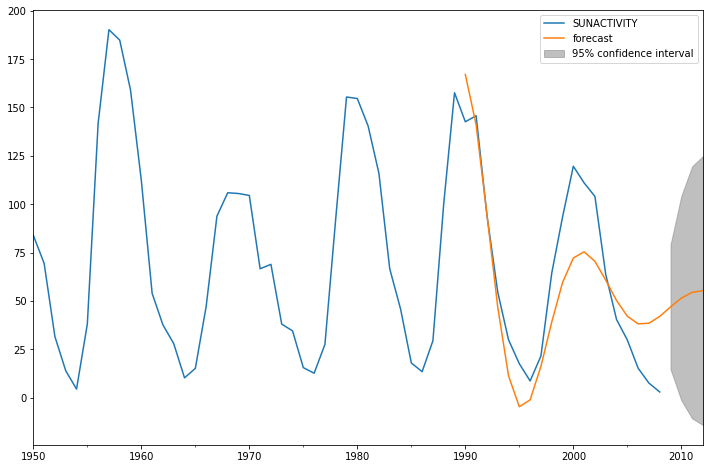

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)

In [23]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [24]:
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

5.63698929359919

### Exercise: Can you obtain a better fit for the Sunspots model? (Hint: sm.tsa.AR has a method select_order)

### Simulated ARMA(4,1): Model Identification is Difficult

In [25]:
from statsmodels.tsa.arima_process import ArmaProcess

In [26]:
np.random.seed(1234)
# include zero-th lag
arparams = np.array([1, .75, -.65, -.55, .9])
maparams = np.array([1, .65])

Let's make sure this model is estimable.

In [27]:
arma_t = ArmaProcess(arparams, maparams)

In [28]:
arma_t.isinvertible

True

In [29]:
arma_t.isstationary

False

* What does this mean?

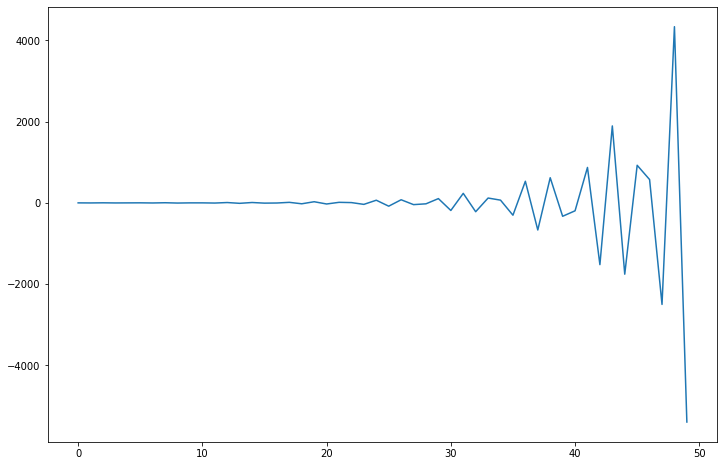

In [30]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(arma_t.generate_sample(nsample=50));

In [31]:
arparams = np.array([1, .35, -.15, .55, .1])
maparams = np.array([1, .65])
arma_t = ArmaProcess(arparams, maparams)
arma_t.isstationary

True

In [32]:
arma_rvs = arma_t.generate_sample(nsample=500, burnin=250, scale=2.5)

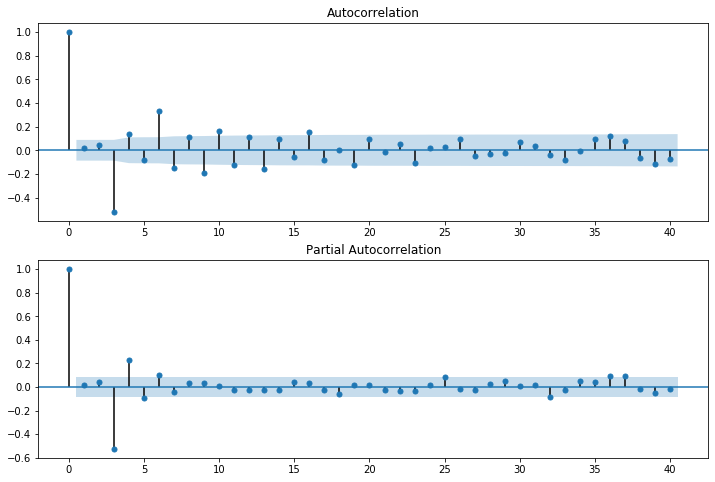

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_rvs, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_rvs, lags=40, ax=ax2)

* For mixed ARMA processes the Autocorrelation function is a mixture of exponentials and damped sine waves after (q-p) lags.
* The partial autocorrelation function is a mixture of exponentials and dampened sine waves after (p-q) lags.

In [34]:
arma11 = sm.tsa.ARMA(arma_rvs, (1,1)).fit(disp=False)
resid = arma11.resid
r,q,p = sm.tsa.acf(resid, fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.254921   32.687652  1.082226e-08
2.0  -0.172416   47.670706  4.450797e-11
3.0  -0.420945  137.159366  1.548487e-29
4.0  -0.046875  138.271272  6.617800e-29
5.0   0.103240  143.675871  2.958774e-29
6.0   0.214864  167.132969  1.823745e-33
7.0  -0.000889  167.133371  1.009220e-32
8.0  -0.045418  168.185721  3.094882e-32
9.0  -0.061445  170.115773  5.837297e-32
10.0  0.034623  170.729827  1.958763e-31
11.0  0.006351  170.750528  8.267165e-31
12.0 -0.012882  170.835880  3.220277e-30
13.0 -0.053959  172.336519  6.181277e-30
14.0 -0.016606  172.478936  2.160243e-29
15.0  0.051742  173.864458  4.089601e-29
16.0  0.078917  177.094252  3.217978e-29
17.0 -0.001834  177.096000  1.093182e-28
18.0 -0.101604  182.471907  3.103866e-29
19.0 -0.057342  184.187742  4.624129e-29
20.0  0.026975  184.568256  1.235687e-28
21.0  0.062359  186.605932  1.530280e-28
22.0 -0.009400  186.652334  4.548257e-28
23.0 -0.068037  

In [35]:
arma41 = sm.tsa.ARMA(arma_rvs, (4,1)).fit(disp=False)
resid = arma41.resid
r,q,p = sm.tsa.acf(resid, fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.007889   0.031302  0.859569
2.0   0.004132   0.039907  0.980244
3.0   0.018103   0.205416  0.976710
4.0  -0.006760   0.228539  0.993948
5.0   0.018120   0.395025  0.995466
6.0   0.050688   1.700448  0.945087
7.0   0.010252   1.753955  0.972196
8.0  -0.011206   1.818018  0.986092
9.0   0.020292   2.028518  0.991009
10.0  0.001029   2.029060  0.996113
11.0 -0.014035   2.130168  0.997984
12.0 -0.023858   2.422925  0.998427
13.0 -0.002108   2.425216  0.999339
14.0 -0.018783   2.607429  0.999590
15.0  0.011316   2.673698  0.999805
16.0  0.042159   3.595419  0.999443
17.0  0.007943   3.628204  0.999734
18.0 -0.074311   6.503854  0.993686
19.0 -0.023379   6.789066  0.995256
20.0  0.002398   6.792072  0.997313
21.0  0.000487   6.792197  0.998516
22.0  0.017952   6.961434  0.999024
23.0 -0.038576   7.744465  0.998744
24.0 -0.029816   8.213248  0.998859
25.0  0.077850  11.415822  0.990675
26.0  0.040408  12.280446  0

### Exercise: How good of in-sample prediction can you do for another series, say, CPI

In [36]:
macrodta = sm.datasets.macrodata.load_pandas().data
macrodta.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
cpi = macrodta["cpi"]

#### Hint: 

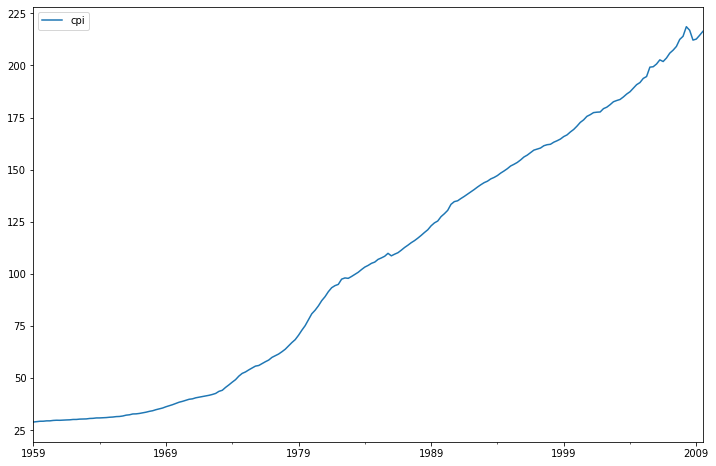

In [37]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = cpi.plot(ax=ax);
ax.legend();

P-value of the unit-root test, resoundingly rejects the null of a unit-root.

In [38]:
print(sm.tsa.adfuller(cpi)[1])

0.9904328188337421
